# Exploratory Data Analysis

In [2]:
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
# Loading data

edges = pd.read_csv("https://raw.githubusercontent.com/AlbertoParravicini/high-performance-graph-analytics-2020/main/track-ml/data/polimi.case.graphs.edges.csv", low_memory=False)
nodes = pd.read_csv("https://raw.githubusercontent.com/AlbertoParravicini/high-performance-graph-analytics-2020/main/track-ml/data/polimi.case.graphs.vertices.csv", low_memory=False)

## Nodes

In [4]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319376 entries, 0 to 319375
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   node_id                 319376 non-null  int64  
 1   Label                   319376 non-null  object 
 2   Revenue Size Flag       141876 non-null  object 
 3   Account ID String       141876 non-null  object 
 4   Address                 30000 non-null   object 
 5   Person or Organisation  147500 non-null  object 
 6   Name                    147500 non-null  object 
 7   Income Size Flag        56226 non-null   object 
 8   CoreCaseGraphID         10665 non-null   float64
 9   ExtendedCaseGraphID     32438 non-null   float64
 10  testingFlag             39461 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 26.8+ MB


In [5]:
nodes.describe()

,node_id,CoreCaseGraphID,ExtendedCaseGraphID,testingFlag
count,3.193760e+05,10665.000000,32438.000000,39461.000000
mean,7.730689e+09,1971.711767,1877.953296,0.045412
std,6.917869e+09,1152.091974,1133.632233,0.208209
min,1.001000e+05,1.000000,1.000000,0.000000
25%,1.502012e+09,973.000000,897.000000,0.000000
50%,3.001167e+09,1956.000000,1847.000000,0.000000
75%,1.502007e+10,2961.000000,2805.000000,0.000000
max,2.003003e+10,4000.000000,4000.000000,1.000000


In [6]:
nodes.head(5)

,node_id,Label,Revenue Size Flag,Account ID String,Address,Person or Organisation,Name,Income Size Flag,CoreCaseGraphID,ExtendedCaseGraphID,testingFlag
0,1502000,Account,mid_high,RvIOFQqK0E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1502001,Account,low,cSnM0hVDsm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1502002,Account,low,WAQWpZi4AD,NaN,NaN,NaN,NaN,2492.0,NaN,0.0
3,1502003,Account,mid_high,n5J9mBTeZc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1502004,Account,low,qxlAEuUm7P,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

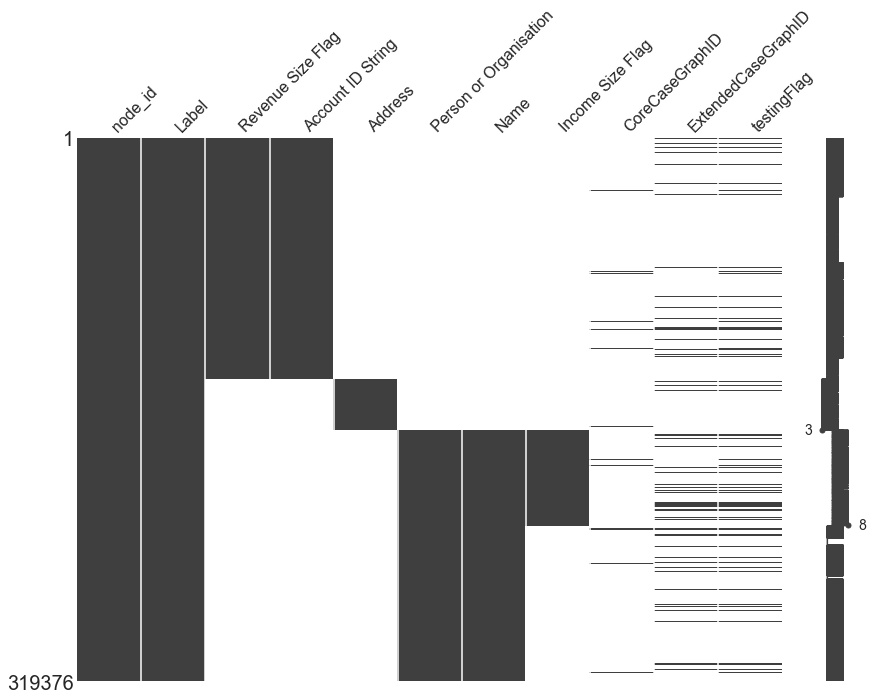

In [7]:
missingno.matrix(nodes, figsize = (14, 10))

In [8]:
nodes.isnull().sum()

node_id                        0
Label                          0
Revenue Size Flag         177500
Account ID String         177500
Address                   289376
Person or Organisation    171876
Name                      171876
Income Size Flag          263150
CoreCaseGraphID           308711
ExtendedCaseGraphID       286938
testingFlag               279915
dtype: int64

In [9]:
nodes.shape

(319376, 11)

In [10]:
nodes.dtypes

node_id                     int64
Label                      object
Revenue Size Flag          object
Account ID String          object
Address                    object
Person or Organisation     object
Name                       object
Income Size Flag           object
CoreCaseGraphID           float64
ExtendedCaseGraphID       float64
testingFlag               float64
dtype: object

## Edges

In [11]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921876 entries, 0 to 921875
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   edge_id              921876 non-null  int64 
 1   from_id              921876 non-null  int64 
 2   to_id                921876 non-null  int64 
 3   Label                921876 non-null  object
 4   Similarity Strength  110000 non-null  object
 5   Amount Flag          500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 42.2+ MB


In [12]:
edges.describe()

,edge_id,from_id,to_id
count,9.218760e+05,9.218760e+05,9.218760e+05
mean,4.018105e+11,8.922334e+09,1.160610e+10
std,1.619205e+11,7.791846e+09,6.191025e+09
min,5.000010e+06,1.001000e+05,2.501100e+05
25%,3.501112e+11,1.001037e+09,3.001169e+09
50%,4.001115e+11,1.502001e+10,1.502004e+10
75%,5.001116e+11,1.502007e+10,1.502007e+10
max,6.501119e+11,2.003003e+10,2.003003e+10


In [13]:
edges.head(5)

,edge_id,from_id,to_id,Label,Similarity Strength,Amount Flag
0,400111489790,1502000,2003003713,money transfer,NaN,medium
1,400111390345,1502000,20030012850,money transfer,NaN,small
2,350111213741,1502001,15020066888,money transfer,NaN,small
3,350111280215,1502001,15020063877,money transfer,NaN,medium
4,400111415408,1502001,20030019012,money transfer,NaN,small


<AxesSubplot:>

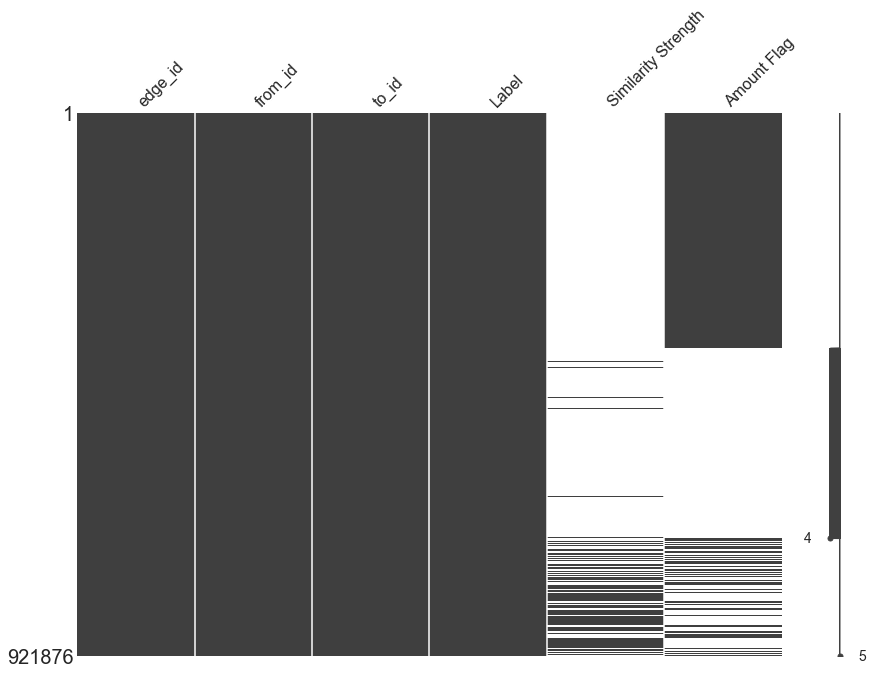

In [14]:
missingno.matrix(edges, figsize = (14, 10))

In [15]:
edges.isnull().sum()

edge_id                     0
from_id                     0
to_id                       0
Label                       0
Similarity Strength    811876
Amount Flag            421876
dtype: int64

In [16]:
edges.shape

(921876, 6)

In [17]:
edges.dtypes

edge_id                 int64
from_id                 int64
to_id                   int64
Label                  object
Similarity Strength    object
Amount Flag            object
dtype: object

## More in-depth Analysis

In [18]:
print("Core Cases: ",len(nodes.CoreCaseGraphID.value_counts()))

Core Cases:  4000


In [19]:
print("Testing nodes: ",nodes.testingFlag.notnull().sum())

Testing nodes:  39461


In [20]:
# Average number of nodes with the same Core case ID:

nodes.groupby(['CoreCaseGraphID']).size().mean()

2.66625

In [21]:
nodes.groupby(['ExtendedCaseGraphID']).size().mean()

10.766013939595087

In [22]:
# Average number of nodes with the same address

nodes.groupby(['Address']).size().mean()

1.0

In [23]:
nodes.groupby(['Name']).size()

Name
(CYP)MENWIN BUSINESS CONSULTANT LTD.             2
(E.R.I.) Holding SAL                             1
(GENEVA CLIENT)  CUART ABOGADOS                  1
(GENEVA CLIENT)  EUROPA TRUST COMPANY LIMITED    1
(GENEVA CLIENT)  FARIA, DAVID                    1
                                                ..
zzyCkSOFEi                                       1
zzziJKWaFd                                       1
ÁNGELA MARÍA SÁNCHEZ ARISTIZABAL                 1
ÂNGELO CRICA                                     1
ÉQUITAS ESTUDIO JURIDICO                         1
Length: 143486, dtype: int64

In [24]:
# Nodes that only have an ID and a label and nothing else
# (without looking at core cases)

nodes[nodes['Revenue Size Flag'].isna() & 
      nodes['Account ID String'].isna() & 
      nodes['Address'].isna() &
      nodes['Person or Organisation'].isna() &
      nodes['Name'].isna() &
      nodes['Income Size Flag'].isna()
     ].shape[0]

0

In [25]:
# Address of nodes that are part of a core case

nodes.groupby(['Address', 'CoreCaseGraphID']).size()

Address     CoreCaseGraphID
0TvH4PSFzP  1265.0             1
0h2d0khB13  21.0               1
0ilIw8k1iP  1781.0             1
18Ys0kjDxb  490.0              1
1WQFkNjmmP  3030.0             1
                              ..
ymNKgGe8SG  2795.0             1
zNN7T5yJZ7  2545.0             1
zPjsLO0Dpe  3824.0             1
zRqhR6Mni2  347.0              1
zY185mtj2f  1285.0             1
Length: 327, dtype: int64

In [26]:
# Account ID String of nodes that are part of a core case

nodes.groupby(['Account ID String', 'CoreCaseGraphID']).size()

Account ID String  CoreCaseGraphID
009Hse6y9M         1523.0             1
0329KxdruB         53.0               1
039F6mA1X6         1244.0             1
03b1rPoLh3         260.0              1
05XCyDvbbS         1566.0             1
                                     ..
zxdXmHdrZ6         694.0              1
zyLVjwaB00         400.0              1
zyT6gv6ExG         119.0              1
zyYNQwOShV         3700.0             1
zzzMI7t7lo         3817.0             1
Length: 5988, dtype: int64

In [27]:
# Name of nodes that are part of a core case

mask = nodes.loc[nodes['CoreCaseGraphID'].notnull()]
no_name = mask['Name'].isna().sum()
mask = mask.loc[mask['Name'].notnull()]
mask = mask[['Name','CoreCaseGraphID']]

mask.tail(20)

,Name,CoreCaseGraphID
317351,ar1w4WV0si,2912.0
317361,mzqljMuCNS,2801.0
317377,GHJMd1J17E,949.0
317396,SEdWtAj37P,3492.0
317400,uLsdLIQ0ls,2585.0
317506,T1ELwFJmAa,3477.0
317743,KjHwozK9Dq,3540.0
318002,NQ3fpgbKQH,2915.0
318348,zXkG6OK762,645.0
318552,OLEgM6B71k,1217.0


In [28]:
# Nodes that are part of a core case and don't have a Name

no_name

6315

In [29]:
# Number of extended cases for each node type

accounts = nodes.loc[nodes['Label'] == 'Account']
accounts['ExtendedCaseGraphID'].notnull().sum()

10042

In [30]:
accounts = nodes.loc[nodes['Label'] == 'Customer']
accounts['ExtendedCaseGraphID'].notnull().sum()

12357

In [31]:
accounts = nodes.loc[nodes['Label'] == 'Address']
accounts['ExtendedCaseGraphID'].notnull().sum()

1568

In [32]:
accounts = nodes.loc[nodes['Label'] == 'Derived Entity']
accounts['ExtendedCaseGraphID'].notnull().sum()

3825

In [33]:
accounts = nodes.loc[nodes['Label'] == 'External Entity']
accounts['ExtendedCaseGraphID'].notnull().sum()

4646

In [34]:
# So most fraudolent nodes are the "Account" and "Customer" nodes by far!
# Ranked:

# 1: Customer
# 2: Account
# 3: External Entity
# 4: Derived Entity
# 5: Address

# With just Customer, Account and Derived Entity I have 80% of all the cases.